## Run data pipeline
Returns an aggegrated df to work with

In [2]:
# Only for Wesley %run "./Data"

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#Copy this cell to every new version of Main
#import dataframe
df_hourly = pd.read_parquet('/home/joelva/code/pgt-group-3/data/raw/Complete_Set/HECTORdataAggregated_Hourly_20240331152619.parquet')

# Print the number of rows
print(f"Number of rows in the file: {len(df_hourly)}")

Number of rows in the file: 2667


## Import utilities
Import custom function

In [5]:
#Copy this cell to every new version of Main
%run "Utilities.ipynb" 

In [6]:
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [7]:
#Copy this cell to every new version of Main
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
#Copy this cell to every new version of Main
df_hourly.head()

,Vdatetime,datetime,BatSOC,ThrottlePerc,RearAxle1,H2Weight,MotorRPM,MotorTorque,MotorTemp,BattOutputPower,...,TotalPowerDraw,DayOfWeek,AirTemp,Is_Friday,Is_Monday,Is_Saturday,Is_Sunday,Is_Thursday,Is_Tuesday,Is_Wednesday
0,2022-08-01 04,2022-08-01 04:59:59.880000+00:00,87.733572,94.314217,7108.281063,6241.840427,32.226553,251.142921,40.973181,17290.052132,...,13713.046695,Monday,20.6,0,1,0,0,0,0,0
1,2022-08-01 05,2022-08-01 05:59:59.990000+00:00,81.852431,68.168056,8580.659722,6637.344792,10.728542,119.177014,50.915306,15929.268472,...,9444.155245,Monday,20.6,0,1,0,0,0,0,0
2,2022-08-01 06,2022-08-01 06:59:59.870000+00:00,54.056532,98.022640,7776.109452,5644.733940,37.581013,235.988194,56.864547,16360.531741,...,12075.898738,Monday,20.6,0,1,0,0,0,0,0
3,2022-08-01 07,2022-08-01 07:59:59.820000+00:00,46.348187,213.243523,8328.226385,6329.168194,212.520287,445.930969,72.886717,18460.976244,...,40680.984837,Monday,20.6,0,1,0,0,0,0,0
4,2022-08-01 08,2022-08-01 08:59:59.940000+00:00,24.638125,47.125000,3179.993056,2554.907153,28.368542,71.331042,70.815041,-16121.872074,...,5412.054734,Monday,20.6,0,1,0,0,0,0,0


In [9]:
df_hourly

,Vdatetime,datetime,BatSOC,ThrottlePerc,RearAxle1,H2Weight,MotorRPM,MotorTorque,MotorTemp,BattOutputPower,...,TotalPowerDraw,DayOfWeek,AirTemp,Is_Friday,Is_Monday,Is_Saturday,Is_Sunday,Is_Thursday,Is_Tuesday,Is_Wednesday
0,2022-08-01 04,2022-08-01 04:59:59.880000+00:00,87.733572,94.314217,7108.281063,6241.840427,32.226553,251.142921,40.973181,17290.052132,...,13713.046695,Monday,20.6,0,1,0,0,0,0,0
1,2022-08-01 05,2022-08-01 05:59:59.990000+00:00,81.852431,68.168056,8580.659722,6637.344792,10.728542,119.177014,50.915306,15929.268472,...,9444.155245,Monday,20.6,0,1,0,0,0,0,0
2,2022-08-01 06,2022-08-01 06:59:59.870000+00:00,54.056532,98.022640,7776.109452,5644.733940,37.581013,235.988194,56.864547,16360.531741,...,12075.898738,Monday,20.6,0,1,0,0,0,0,0
3,2022-08-01 07,2022-08-01 07:59:59.820000+00:00,46.348187,213.243523,8328.226385,6329.168194,212.520287,445.930969,72.886717,18460.976244,...,40680.984837,Monday,20.6,0,1,0,0,0,0,0
4,2022-08-01 08,2022-08-01 08:59:59.940000+00:00,24.638125,47.125000,3179.993056,2554.907153,28.368542,71.331042,70.815041,-16121.872074,...,5412.054734,Monday,20.6,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662,2023-04-29 12,2023-04-29 12:59:59.840000+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,...,0.000000,Saturday,11.4,0,0,1,0,0,0,0
2663,2023-04-29 13,2023-04-29 13:59:59.830000+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,...,0.000000,Saturday,11.4,0,0,1,0,0,0,0
2664,2023-04-29 14,2023-04-29 14:59:59.840000+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,...,0.000000,Saturday,11.4,0,0,1,0,0,0,0
2665,2023-04-29 15,2023-04-29 15:59:59.920000+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,...,0.000000,Saturday,11.4,0,0,1,0,0,0,0


In [10]:
#Copy this cell to every new version of Main
df_hourly.describe


<bound method NDFrame.describe of           Vdatetime                         datetime     BatSOC  ThrottlePerc  \
0     2022-08-01 04 2022-08-01 04:59:59.880000+00:00  87.733572     94.314217   
1     2022-08-01 05 2022-08-01 05:59:59.990000+00:00  81.852431     68.168056   
2     2022-08-01 06 2022-08-01 06:59:59.870000+00:00  54.056532     98.022640   
3     2022-08-01 07 2022-08-01 07:59:59.820000+00:00  46.348187    213.243523   
4     2022-08-01 08 2022-08-01 08:59:59.940000+00:00  24.638125     47.125000   
...             ...                              ...        ...           ...   
2662  2023-04-29 12 2023-04-29 12:59:59.840000+00:00   0.000000      0.000000   
2663  2023-04-29 13 2023-04-29 13:59:59.830000+00:00   0.000000      0.000000   
2664  2023-04-29 14 2023-04-29 14:59:59.840000+00:00   0.000000      0.000000   
2665  2023-04-29 15 2023-04-29 15:59:59.920000+00:00   0.000000      0.000000   
2666  2023-04-29 16 2023-04-29 16:04:35.180000+00:00   0.000000      0.0000

In [11]:
#check min/max values and number of rows
import pandas as pd

min_datetime = df_hourly['Vdatetime'].min()
max_datetime = df_hourly['Vdatetime'].max()

print(f"Minimum datetime: {min_datetime}")
print(f"Maximum datetime: {max_datetime}")

df_hourly.shape
print(df_hourly.shape)

Minimum datetime: 2022-08-01 04
Maximum datetime: 2023-04-29 16
(2667, 23)


In [12]:
#Copy this cell to every new version of Main 
# List data types of each column
dtypes_result = df_hourly.dtypes

# Display descriptive statistics for numerical columns
describe_result = df_hourly.describe()

# Combine both results in one code snippet
combined_result = pd.concat([dtypes_result, describe_result], axis=1, keys=['Data Types', 'Statistics'])

# Display the combined result
print(combined_result)


                              Data Types   Statistics               \
                                       0       BatSOC ThrottlePerc   
Vdatetime                         object          NaN          NaN   
datetime         datetime64[us, Etc/UTC]          NaN          NaN   
BatSOC                           float64          NaN          NaN   
ThrottlePerc                     float64          NaN          NaN   
RearAxle1                        float64          NaN          NaN   
H2Weight                         float64          NaN          NaN   
MotorRPM                         float64          NaN          NaN   
MotorTorque                      float64          NaN          NaN   
MotorTemp                        float64          NaN          NaN   
BattOutputPower                  float64          NaN          NaN   
MotorPowerDraw                   float64          NaN          NaN   
TotalFCPower                     float64          NaN          NaN   
ActualSpeed         

In [13]:
#Copy this cell to every new version of Main
df_hourly_notime = df_hourly.drop(columns=['Vdatetime','datetime'])

(                   BatSOC  ThrottlePerc  RearAxle1  H2Weight  MotorRPM  \
 BatSOC           1.000000     -0.123986  -0.153692 -0.149877 -0.141635   
 ThrottlePerc    -0.123986      1.000000   0.821698  0.742241  0.904431   
 RearAxle1       -0.153692      0.821698   1.000000  0.850038  0.614911   
 H2Weight        -0.149877      0.742241   0.850038  1.000000  0.574161   
 MotorRPM        -0.141635      0.904431   0.614911  0.574161  1.000000   
 MotorTorque     -0.117094      0.971405   0.811191  0.707331  0.887734   
 MotorTemp        0.225863      0.279463   0.106280  0.118007  0.297823   
 BattOutputPower -0.000979      0.479602   0.473667  0.401252  0.384267   
 MotorPowerDraw  -0.137334      0.936735   0.669645  0.602792  0.982881   
 TotalFCPower    -0.109669      0.687373   0.551397  0.517806  0.678086   
 ActualSpeed     -0.141635      0.904431   0.614911  0.574161  1.000000   
 TotalPowerDraw  -0.162970      0.887276   0.686176  0.618396  0.872368   
 AirTemp          0.01006

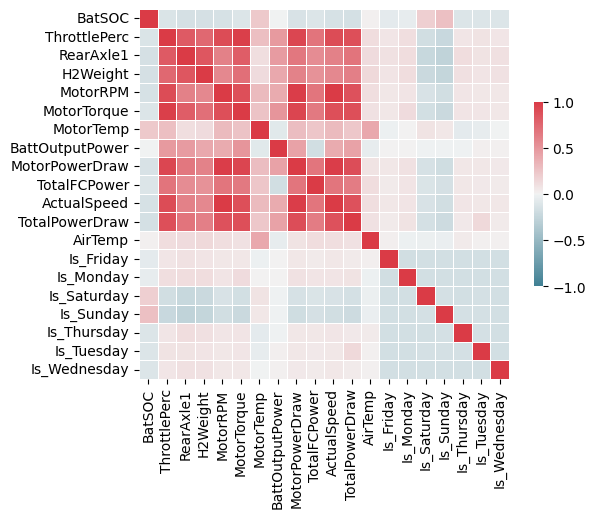

In [14]:
#Copy this cell to every new version of Main
df_hourly_numeric = df_hourly.select_dtypes(include=[np.number])
plot_corr(df_hourly_numeric)


In [15]:
#check which format the dataset is

# Assuming 'data' is the variable containing the dataset

# Check if it's a NumPy array
if isinstance(df_hourly_numeric, np.ndarray):
    print("Data is stored as NumPy array.")
elif isinstance(df_hourly_numeric, pd.DataFrame):
    print("Data is stored as Pandas DataFrame.")
else:
    print("Data format is not recognized.")

Data is stored as Pandas DataFrame.


In [16]:
df_hourly_numeric

,BatSOC,ThrottlePerc,RearAxle1,H2Weight,MotorRPM,MotorTorque,MotorTemp,BattOutputPower,MotorPowerDraw,TotalFCPower,ActualSpeed,TotalPowerDraw,AirTemp,Is_Friday,Is_Monday,Is_Saturday,Is_Sunday,Is_Thursday,Is_Tuesday,Is_Wednesday
0,87.733572,94.314217,7108.281063,6241.840427,32.226553,251.142921,40.973181,17290.052132,8695.370447,-0.051739,5.639647,13713.046695,20.6,0,1,0,0,0,0,0
1,81.852431,68.168056,8580.659722,6637.344792,10.728542,119.177014,50.915306,15929.268472,3729.665322,-0.049446,1.877495,9444.155245,20.6,0,1,0,0,0,0,0
2,54.056532,98.022640,7776.109452,5644.733940,37.581013,235.988194,56.864547,16360.531741,9627.912223,-0.054463,6.576677,12075.898738,20.6,0,1,0,0,0,0,0
3,46.348187,213.243523,8328.226385,6329.168194,212.520287,445.930969,72.886717,18460.976244,40360.854504,27247.517613,37.191050,40680.984837,20.6,0,1,0,0,0,0,0
4,24.638125,47.125000,3179.993056,2554.907153,28.368542,71.331042,70.815041,-16121.872074,4004.707189,25121.991631,4.964495,5412.054734,20.6,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.059583,0.000000,0.000000,11.4,0,0,1,0,0,0,0
2663,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.060000,0.000000,0.000000,11.4,0,0,1,0,0,0,0
2664,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.060000,0.000000,0.000000,11.4,0,0,1,0,0,0,0
2665,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.060000,0.000000,0.000000,11.4,0,0,1,0,0,0,0


In [17]:
#define the totlpowerdraw feature 
describe_column(df_hourly_numeric,'TotalPowerDraw',100000)

Column: TotalPowerDraw
Minimum value: -16.571758126529186
Maximum value: 65000.0
Number of values per bin (excluding bins with 0 values):
(-16.573, 99983.428]: 2661 values


/tmp/ipykernel_139573/2386358824.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = data.groupby('Bin')[column_name].size()


In [18]:
describe_column(df_hourly_numeric,'ActualSpeed',0.1)

Column: ActualSpeed
Minimum value: -0.05926029543419879
Maximum value: 49.97706958843885
Number of values per bin (excluding bins with 0 values):
(-0.0603, 0.0407]: 1869 values
(0.0407, 0.141]: 13 values
(0.141, 0.241]: 7 values
(0.241, 0.341]: 7 values
(0.341, 0.441]: 5 values
(0.641, 0.741]: 1 values
(0.841, 0.941]: 1 values
(0.941, 1.041]: 1 values
(1.041, 1.141]: 2 values
(1.141, 1.241]: 2 values
(1.241, 1.341]: 1 values
(1.341, 1.441]: 6 values
(1.441, 1.541]: 5 values
(1.541, 1.641]: 7 values
(1.641, 1.741]: 4 values
(1.741, 1.841]: 11 values
(1.841, 1.941]: 8 values
(1.941, 2.041]: 8 values
(2.041, 2.141]: 11 values
(2.141, 2.241]: 8 values
(2.241, 2.341]: 8 values
(2.341, 2.441]: 8 values
(2.441, 2.541]: 10 values
(2.541, 2.641]: 13 values
(2.641, 2.741]: 9 values
(2.741, 2.841]: 18 values
(2.841, 2.941]: 7 values
(2.941, 3.041]: 18 values
(3.041, 3.141]: 15 values
(3.141, 3.241]: 11 values
(3.241, 3.341]: 7 values
(3.341, 3.441]: 13 values
(3.441, 3.541]: 7 values
(3.541, 3.64

/tmp/ipykernel_139573/2386358824.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = data.groupby('Bin')[column_name].size()


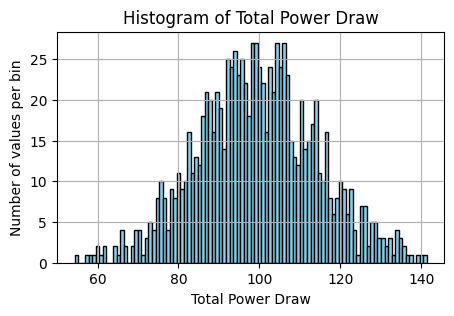

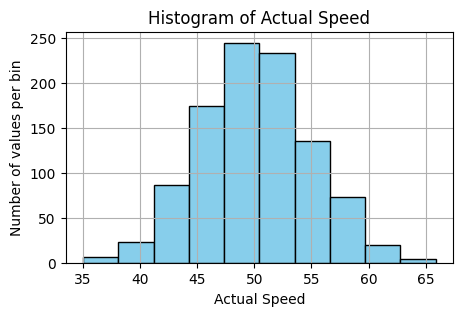

Motor Power Draw Distribution Analysis: {'MotorPowerDraw': {'norm': {'D': 0.029013779100443116, 'p-value': 0.36212023984775}, 'lognorm': {'D': 0.029016309451244227, 'p-value': 0.3620152284535407}, 'expon': {'D': 0.35207039485781355, 'p-value': 2.3743284532103934e-111}, 'gamma': {'D': 0.03216226126393451, 'p-value': 0.24683888260645037}}}
Total Power Draw Distribution Analysis: {'TotalPowerDraw': {'norm': {'D': 0.01903411267034627, 'p-value': 0.8547733408587844}, 'lognorm': {'D': 0.01756571484556879, 'p-value': 0.9117423003473928}, 'expon': {'D': 0.3456502749283126, 'p-value': 3.169895355050558e-107}, 'gamma': {'D': 0.017571879744881946, 'p-value': 0.911531881151916}}}


In [19]:
#check linear relationship, create a temporary dataset df_hourly_numeric
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Assuming df_hourly_numeric is already defined with at least 'TotalPowerDraw', 'ActualSpeed', and 'MotorPowerDraw' columns
# For demonstration, let's create a dummy df_hourly_numeric with random data for 'TotalPowerDraw' and 'ActualSpeed'
np.random.seed(0)
df_hourly_numeric_dum = {
    'TotalPowerDraw': np.random.normal(loc=100, scale=15, size=1000),
    'ActualSpeed': np.random.normal(loc=50, scale=5, size=1000),
    'MotorPowerDraw': np.random.normal(loc=120, scale=20, size=1000)  # Adding 'MotorPowerDraw'
}

# Plot histograms
def plot_histograms(data):
    plt.figure(figsize=(5, 3))
    plt.hist(data['TotalPowerDraw'], bins=100, color='skyblue', edgecolor='black')
    plt.title('Histogram of Total Power Draw')
    plt.xlabel('Total Power Draw')
    plt.ylabel('Number of values per bin')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(5, 3))
    plt.hist(data['ActualSpeed'], bins=10, color='skyblue', edgecolor='black')
    plt.title('Histogram of Actual Speed')
    plt.xlabel('Actual Speed')
    plt.ylabel('Number of values per bin')
    plt.grid(True)
    plt.show()

# Function to analyze distributions
def analyze_distributions(data, columns, distributions):
    results = {}
    for column in columns:
        col_data = data[column]
        results[column] = {}
        for distribution in distributions:
            params = distribution.fit(col_data)
            D, p_value = stats.kstest(col_data, distribution.name, args=params)
            results[column][distribution.name] = {'D': D, 'p-value': p_value}
    return results

# Plot histograms
plot_histograms(df_hourly_numeric_dum)

# Analyze distributions for 'MotorPowerDraw' and 'TotalPowerDraw'
results_motor_power_draw = analyze_distributions(df_hourly_numeric_dum, ['MotorPowerDraw'], [stats.norm, stats.lognorm, stats.expon, stats.gamma])
results_total_power_draw = analyze_distributions(df_hourly_numeric_dum, ['TotalPowerDraw'], [stats.norm, stats.lognorm, stats.expon, stats.gamma])

print("Motor Power Draw Distribution Analysis:", results_motor_power_draw)
print("Total Power Draw Distribution Analysis:", results_total_power_draw)

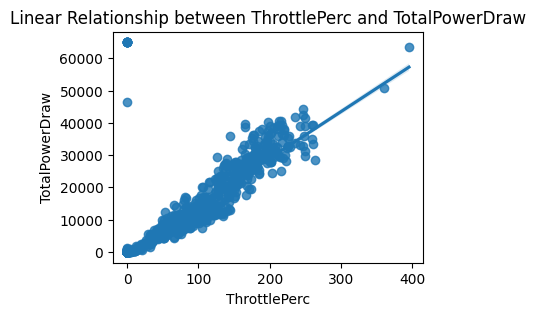

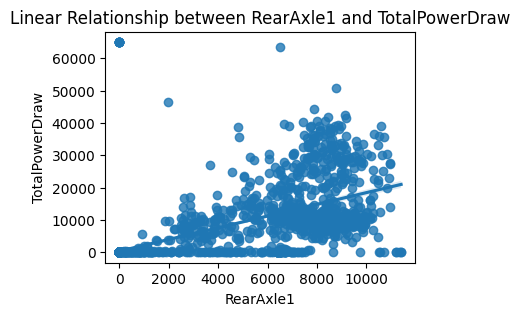

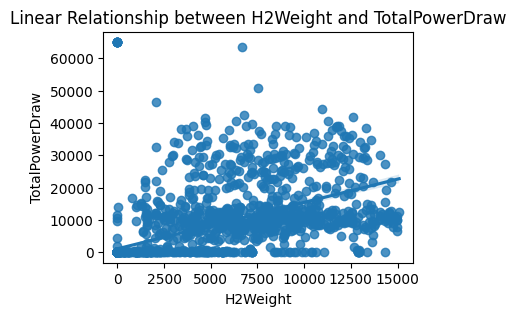

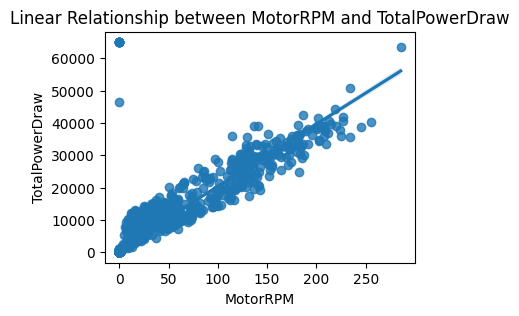

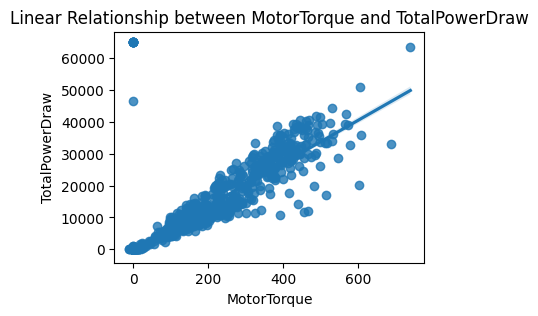

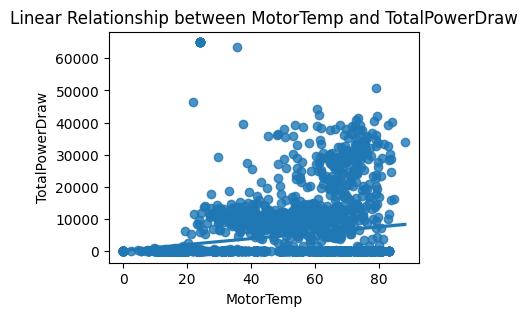

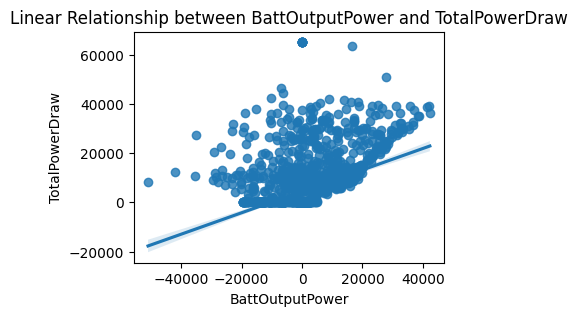

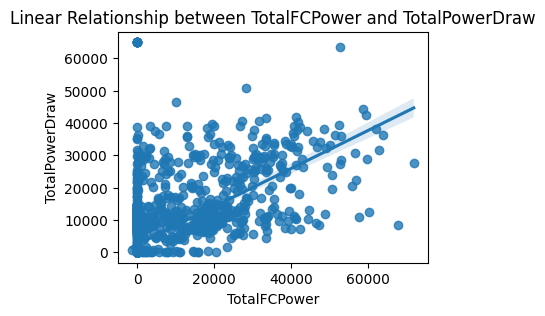

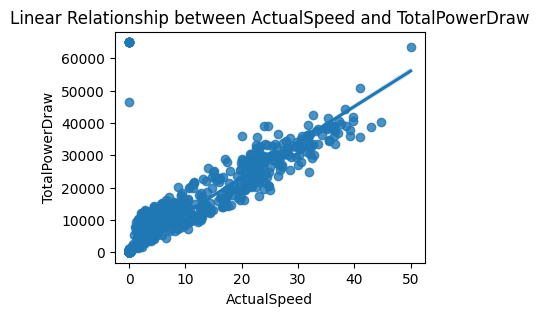

Plotting the linear relationship between Throttle Percentage and Total Power Draw...


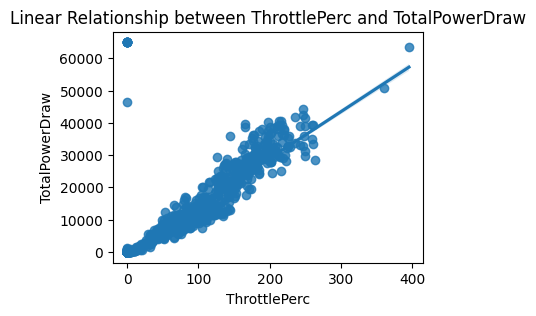

Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...


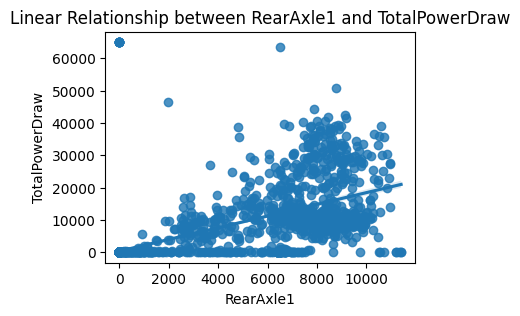

Plotting the linear relationship between Throttle Percentage and TotalPowerDraw...


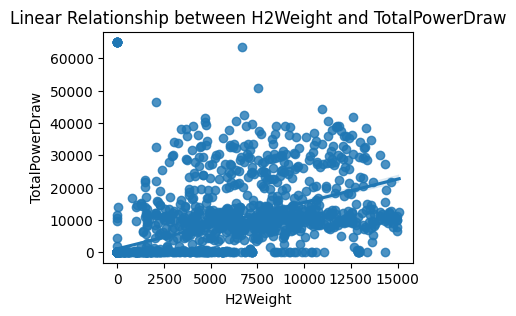

Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...


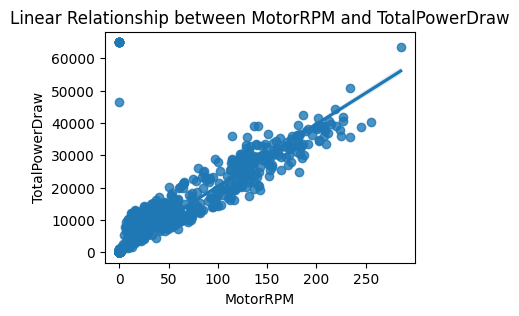

Plotting the linear relationship between Throttle Percentage and TotalPowerDraw...


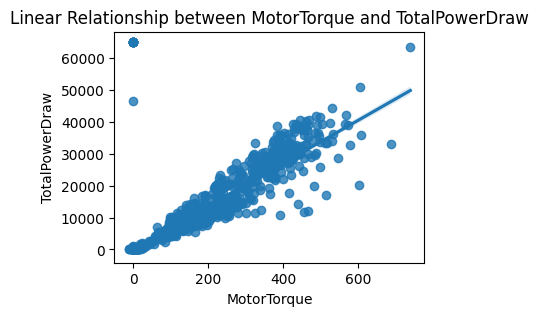

Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...


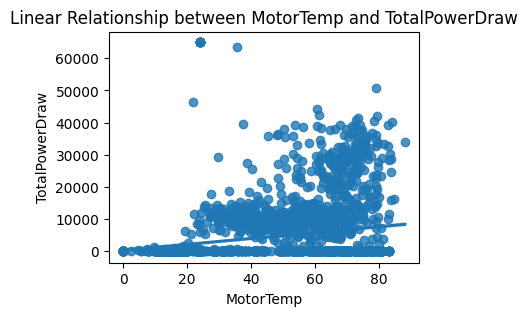

Plotting the linear relationship between Throttle Percentage and TotalPowerDraw..


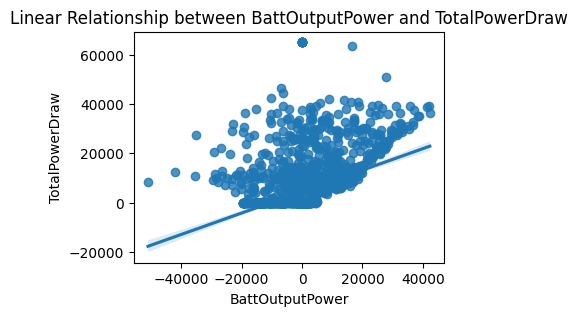

Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...


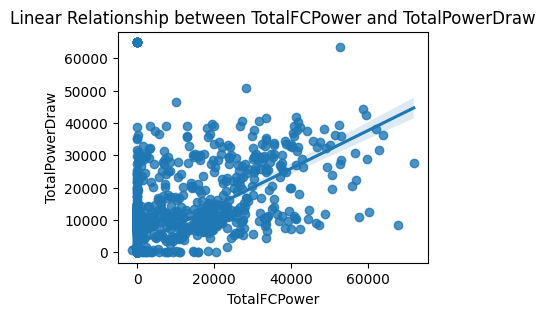

Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...


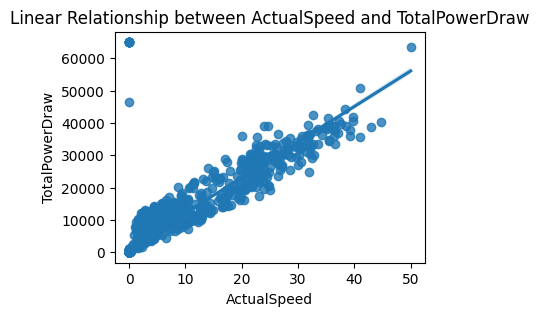

In [20]:
def plot_linear_relationships(df_hourly_numeric, x_col, y_col, figsize=(4, 3)):
    """
    Plot the linear relationship between two columns from a DataFrame.
    
    - x_col: The name of the column to use as the x-axis.
    - y_col: The name of the column to use as the y-axis.
    - figsize: Tuple representing the figure size.
    """
    plt.figure(figsize=figsize)
    sns.regplot(x=x_col, y=y_col, data=df_hourly)
    plt.title(f'Linear Relationship between {x_col} and {y_col}')
    plt.show()

plot_linear_relationships(df_hourly_numeric, 'ThrottlePerc','TotalPowerDraw')
plot_linear_relationships(df_hourly_numeric, 'RearAxle1','TotalPowerDraw')
plot_linear_relationships(df_hourly_numeric, 'H2Weight','TotalPowerDraw')
plot_linear_relationships(df_hourly_numeric, 'MotorRPM','TotalPowerDraw')
plot_linear_relationships(df_hourly_numeric, 'MotorTorque','TotalPowerDraw')
plot_linear_relationships(df_hourly_numeric, 'MotorTemp','TotalPowerDraw')
plot_linear_relationships(df_hourly_numeric, 'BattOutputPower','TotalPowerDraw')
plot_linear_relationships(df_hourly_numeric, 'TotalFCPower','TotalPowerDraw')
plot_linear_relationships(df_hourly_numeric, 'ActualSpeed','TotalPowerDraw')

print("Plotting the linear relationship between Throttle Percentage and Total Power Draw...")
plot_linear_relationships(df_hourly_numeric, 'ThrottlePerc', 'TotalPowerDraw')

print("Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...")
plot_linear_relationships(df_hourly_numeric, 'RearAxle1', 'TotalPowerDraw')

print("Plotting the linear relationship between Throttle Percentage and TotalPowerDraw...")
plot_linear_relationships(df_hourly_numeric, 'H2Weight', 'TotalPowerDraw')

print("Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...")
plot_linear_relationships(df_hourly_numeric, 'MotorRPM', 'TotalPowerDraw')

print("Plotting the linear relationship between Throttle Percentage and TotalPowerDraw...")
plot_linear_relationships(df_hourly_numeric, 'MotorTorque', 'TotalPowerDraw')

print("Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...")
plot_linear_relationships(df_hourly_numeric, 'MotorTemp', 'TotalPowerDraw')

print("Plotting the linear relationship between Throttle Percentage and TotalPowerDraw..")
plot_linear_relationships(df_hourly_numeric, 'BattOutputPower', 'TotalPowerDraw')

print("Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...")
plot_linear_relationships(df_hourly_numeric, 'TotalFCPower', 'TotalPowerDraw')

print("Plotting the linear relationship between Rear Axle 1 Load and TotalPowerDraw...")
plot_linear_relationships(df_hourly_numeric, 'ActualSpeed', 'TotalPowerDraw')


In [21]:
# Check the type of df_hourly_numeric
if isinstance(df_hourly_numeric, pd.DataFrame):
    print("df_hourly_numeric is a pandas DataFrame.")
elif isinstance(df_hourly_numeric, np.ndarray):
    print("df_hourly_numeric is a NumPy array.")
else:
    print("df_hourly_numeric is neither a pandas DataFrame nor a NumPy array. It is a", type(df_hourly_numeric))

df_hourly_numeric is a pandas DataFrame.


In [22]:
df_hourly_numeric

,BatSOC,ThrottlePerc,RearAxle1,H2Weight,MotorRPM,MotorTorque,MotorTemp,BattOutputPower,MotorPowerDraw,TotalFCPower,...,TotalPowerDraw,AirTemp,Is_Friday,Is_Monday,Is_Saturday,Is_Sunday,Is_Thursday,Is_Tuesday,Is_Wednesday,Bin
0,87.733572,94.314217,7108.281063,6241.840427,32.226553,251.142921,40.973181,17290.052132,8695.370447,-0.051739,...,13713.046695,20.6,0,1,0,0,0,0,0,"(5.541, 5.641]"
1,81.852431,68.168056,8580.659722,6637.344792,10.728542,119.177014,50.915306,15929.268472,3729.665322,-0.049446,...,9444.155245,20.6,0,1,0,0,0,0,0,"(1.841, 1.941]"
2,54.056532,98.022640,7776.109452,5644.733940,37.581013,235.988194,56.864547,16360.531741,9627.912223,-0.054463,...,12075.898738,20.6,0,1,0,0,0,0,0,"(6.541, 6.641]"
3,46.348187,213.243523,8328.226385,6329.168194,212.520287,445.930969,72.886717,18460.976244,40360.854504,27247.517613,...,40680.984837,20.6,0,1,0,0,0,0,0,"(37.141, 37.241]"
4,24.638125,47.125000,3179.993056,2554.907153,28.368542,71.331042,70.815041,-16121.872074,4004.707189,25121.991631,...,5412.054734,20.6,0,1,0,0,0,0,0,"(4.941, 5.041]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.059583,...,0.000000,11.4,0,0,1,0,0,0,0,"(-0.0603, 0.0407]"
2663,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.060000,...,0.000000,11.4,0,0,1,0,0,0,0,"(-0.0603, 0.0407]"
2664,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.060000,...,0.000000,11.4,0,0,1,0,0,0,0,"(-0.0603, 0.0407]"
2665,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.060000,...,0.000000,11.4,0,0,1,0,0,0,0,"(-0.0603, 0.0407]"


In [23]:
# select the columns , drop the nans and scale the dataset
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Assuming 'df_hourly_numeric' is your original DataFrame
# Lijst van geselecteerde variabelen
selected_columns = [
    "BatSOC", "ThrottlePerc", "RearAxle1", "H2Weight", "MotorRPM", "MotorTemp", "BattOutputPower", "TotalFCPower", 
    "MotorPowerDraw", "ActualSpeed", "TotalPowerDraw", "AirTemp"
]

# Create a DataFrame with selected columns
df_hourly_num_selected = df_hourly_numeric[selected_columns]

# Selecteer alleen de numerieke kolommen
df_hourly_num_clean = df_hourly_num_selected.select_dtypes(include=[np.number])

# Verwijder rijen met ontbrekende waarden
df_hourly_num_clean = df_hourly_num_clean.dropna()

# Assume 'TotalPowerDraw' is the dependent variable, and we remove it from X and create e new list X_columns without 'TotalPowerDraw' 
#this list will not cotain the target variable
X_columns = [col for col in selected_columns if col != 'TotalPowerDraw']

# Selecteer de onafhankelijke variabelen op basis van de geselecteerde lijst
#this gives us a set X without the target varibale
#NOTE< WE DO NOT SCALE THE TARGET VARIABLE y, this is not needed for linear regression
X = df_hourly_num_clean[X_columns]

# Selecteer de afhankelijke variabele
#rhis gives aus a set with only the target variable
y = df_hourly_num_clean['TotalPowerDraw']

# Maak een instantie van de StandardScaler
scaler = StandardScaler()

# Schaal de onafhankelijke variabelen (X)
X_scaled = scaler.fit_transform(X)

# Voeg een constante toe voor de intercept
X_scaled = sm.add_constant(X_scaled)

# Pas het OLS model toe
model = sm.OLS(y, X_scaled).fit()

# Print de samenvatting van het model
print(model.summary())

#OUTPUT We now have a scaled dataset  'X_scaled'

                            OLS Regression Results                            
Dep. Variable:         TotalPowerDraw   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     1255.
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:40:35   Log-Likelihood:                -25722.
No. Observations:                2654   AIC:                         5.147e+04
Df Residuals:                    2643   BIC:                         5.153e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4630.7761     76.168     60.796      0.0

In [24]:
#Check num of rows , colums and type in the X_Scaled set and y set
print(X_scaled.shape)
print(type(X_scaled))
print(y.shape)
print(type(y))

(2654, 12)
<class 'numpy.ndarray'>
(2654,)
<class 'pandas.core.series.Series'>


In [25]:
#Check that X_scaled is scaled 
print(X_scaled)
#X is scaled
y
print(y)
#y is not scaled


[[ 1.          0.57972339  1.0908756  ...  0.60686722  0.32970448
   1.38752209]
 [ 1.          0.40816042  0.63609057 ...  0.00251042 -0.17640908
   1.38752209]
 [ 1.         -0.40269353  1.15537973 ...  0.72036328  0.455761
   1.38752209]
 ...
 [ 1.         -1.97961509 -0.54962118 ... -0.45141275 -0.42898409
   0.10248001]
 [ 1.         -1.97961509 -0.54962118 ... -0.45141275 -0.42898409
   0.10248001]
 [ 1.         -1.97961509 -0.54962118 ... -0.45141275 -0.42898409
   0.10248001]]
0       13713.046695
1        9444.155245
2       12075.898738
3       40680.984837
4        5412.054734
            ...     
2662        0.000000
2663        0.000000
2664        0.000000
2665        0.000000
2666        0.000000
Name: TotalPowerDraw, Length: 2654, dtype: float64


In [26]:
#Create test sets for X_scaled and the target set y
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

# Here, `X_scaled` is your feature matrix after scaling, 
# `y` is your target variable,
# `test_size=0.2` specifies that 20% of the data will be used for the test set (hence 80% for the training set),
# `random_state=42` is set for reproducibility of the results.

END OF PREPROCESSING    

RANDOM FOREST to capture nonlinear relationships and interaction between features

In [27]:
#find the best hyperparamters 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# X_scaled, y, X_train, y_train, X_test, and y_test are already defined

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [10, 50, 100, 200, 300, 400, 500]  # You can adjust this list based on your computational budget
}

# Create a RandomForestRegressor object
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_rf = grid_search.best_estimator_

# Print the best number of trees
print("Best number of trees (n_estimators):", best_rf.n_estimators)

# Optionally, evaluate its performance on the test set
predictions = best_rf.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Test MSE for the best model:", mse)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[CV] END ....................................n_estimators=10; total time=   0.1s
[CV] END ....................................n_estimators=10; total time=   0.1s
[CV] END ....................................n_estimators=10; total time=   0.1s
[CV] END ....................................n_estimators=10; total time=   0.1s
[CV] END ....................................n_estimators=50; total time=   0.6s
[CV] END ....................................n_estimators=50; total time=   0.6s
[CV] END ....................................n_estimators=10; total time=   0.2s
[CV] END ...................................n_estimators=100; total time=   1.2s
[CV] END ...................................n_estimators=100; total time=   1.3s
[CV] END ...................................n_estimators=100; total time=   1.3s
[CV] END ....................................n_estimators=50; total time=   0.8s
[CV] END ....................................n_estimators=50; total time=   0.9s[CV] END ....................

In [28]:
#Run RandomForestRegressor with Best number of trees (n_estimators): 200
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# X_scaled, y, X_train, y_train, X_test, and y_test are already defined

# Create the RandomForestRegressor object
# n_estimators is the number of trees in the forest, you can adjust this and other parameters as needed
random_forest_regressor = RandomForestRegressor(n_estimators=200, random_state=42)

# Fit the model on the training data
random_forest_regressor.fit(X_train, y_train)

# Make predictions on the training set and the test set
y_train_pred = random_forest_regressor.predict(X_train)
y_test_pred = random_forest_regressor.predict(X_test)

# Calculate the performance metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the performance metrics
print(f"Training MSE: {train_mse:.3f}")
print(f"Test MSE: {test_mse:.3f}")
print(f"Training R^2: {train_r2:.3f}")
print(f"Test R^2: {test_r2:.3f}")

# Feature Importance
feature_importances = random_forest_regressor.feature_importances_
# Assuming you want to print feature importance
print("Feature Importances:")
for i, importance in enumerate(feature_importances):
    print(f"Feature {i}: {importance:.3f}")



Training MSE: 337864.876
Test MSE: 989999.352
Training R^2: 0.996
Test R^2: 0.990
Feature Importances:
Feature 0: 0.000
Feature 1: 0.005
Feature 2: 0.150
Feature 3: 0.001
Feature 4: 0.002
Feature 5: 0.001
Feature 6: 0.099
Feature 7: 0.004
Feature 8: 0.029
Feature 9: 0.700
Feature 10: 0.001
Feature 11: 0.009


RF Training MSE: 821453.617
RF Test MSE: 1397206.408
RF Training R^2: 0.990
RF Test R^2: 0.986


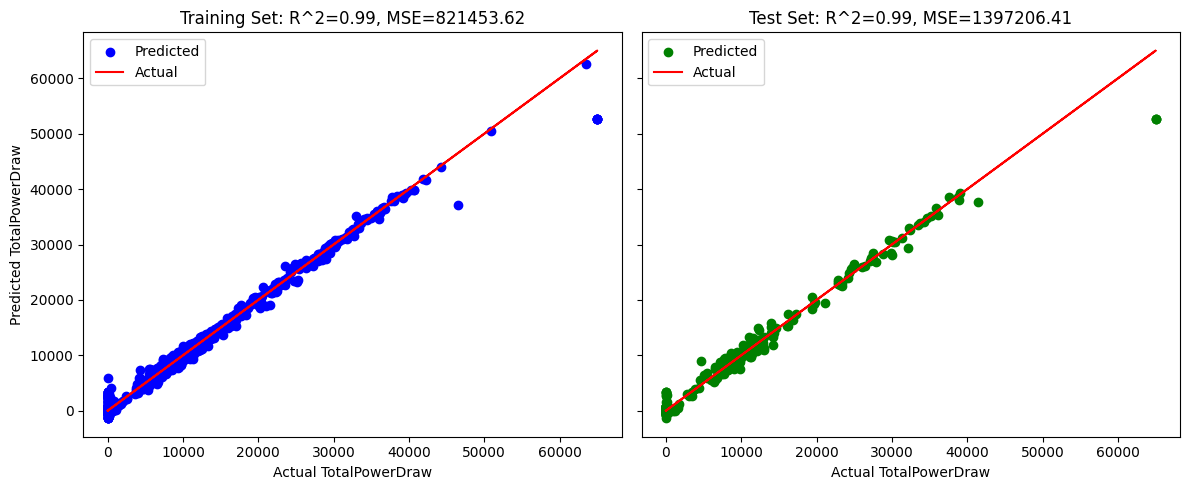

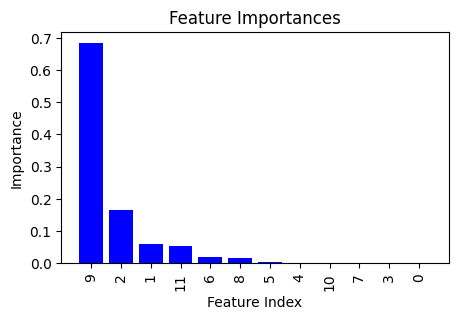

In [40]:
#Random Forest for Regressions

from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# defined y_train, y_train_pred, y_test, and y_test_pred from your model's predictions

# Calculate the performance metrics for the training and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)


# Calculate and print performance metrics
print(f"RF Training MSE: {mean_squared_error(y_train, y_train_pred):.3f}")
print(f"RF Test MSE: {mean_squared_error(y_test, y_test_pred):.3f}")
print(f"RF Training R^2: {r2_score(y_train, y_train_pred):.3f}")
print(f"RF Test R^2: {r2_score(y_test, y_test_pred):.3f}")

# Plotting the Actual vs. Predicted values for both training and test sets
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Training set plot
ax[0].scatter(y_train, y_train_pred, color='blue', label='Predicted')
ax[0].plot(y_train, y_train, color='red', label='Actual')  # A line for perfect predictions
ax[0].set_title(f'Training Set: R^2={train_r2:.2f}, MSE={train_mse:.2f}')
ax[0].set_xlabel('Actual TotalPowerDraw')
ax[0].set_ylabel('Predicted TotalPowerDraw')
ax[0].legend()

# Test set plot
ax[1].scatter(y_test, y_test_pred, color='green', label='Predicted')
ax[1].plot(y_test, y_test, color='red', label='Actual')  # A line for perfect predictions
ax[1].set_title(f'Test Set: R^2={test_r2:.2f}, MSE={test_mse:.2f}')
ax[1].set_xlabel('Actual TotalPowerDraw')
ax[1].legend()

plt.tight_layout()
plt.show()

# Plotting feature importances
plt.figure(figsize=(5, 3))
indices = np.argsort(feature_importances)[::-1]
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), feature_importances[indices], color='b', align='center')
plt.xticks(range(X_train.shape[1]), np.array(range(X_train.shape[1]))[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.show()


GBM (Gradient Boosting Machine) , sequentally adds predictors (as in descision trees) whee every added feature corrects its predecessor, thereby imprving the models accuraty step by step.  GBM iteratively reduce errors using multiple weak learners, making it highly effective for a wide range of problems, 

Training MSE: 821453.617
Test MSE: 1397206.408
Training R^2: 0.990
Test R^2: 0.986


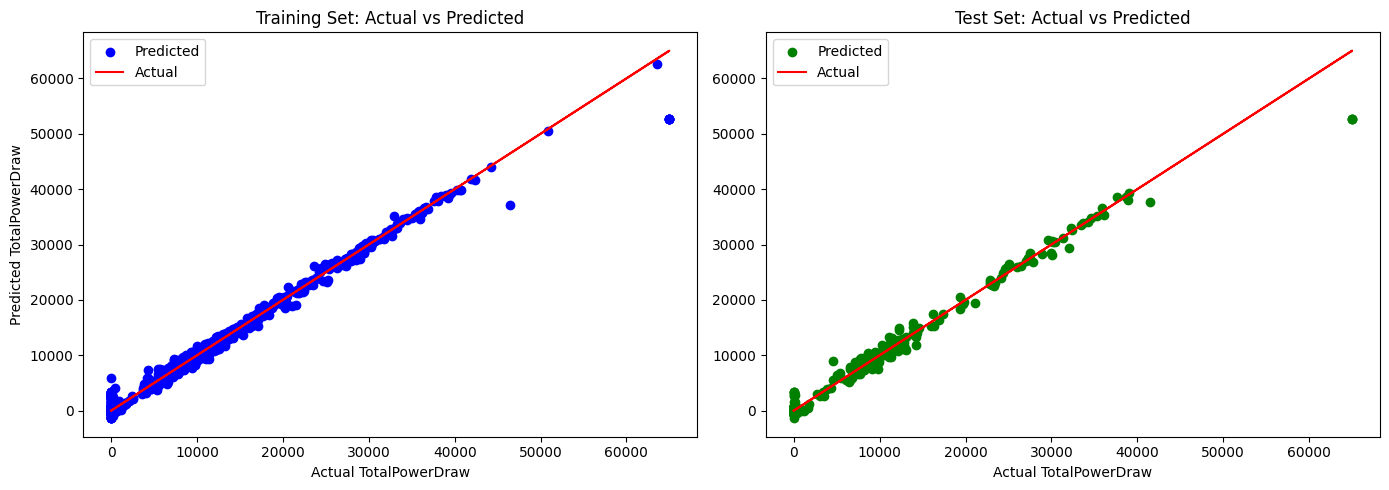

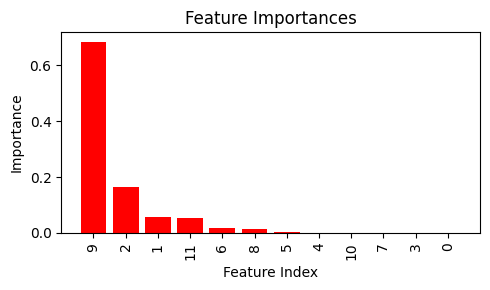

In [39]:
#GBM (Gradient Boosting Machine) 

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize and fit the Gradient Boosting Regressor
gbm_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_regressor.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = gbm_regressor.predict(X_train)
y_test_pred = gbm_regressor.predict(X_test)

# Calculate and print performance metrics
print(f"Training MSE: {mean_squared_error(y_train, y_train_pred):.3f}")
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred):.3f}")
print(f"Training R^2: {r2_score(y_train, y_train_pred):.3f}")
print(f"Test R^2: {r2_score(y_test, y_test_pred):.3f}")

# Plotting Actual vs Predicted values for both training and testing sets
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(y_train, y_train_pred, color='blue', label='Predicted')
axes[0].plot(y_train, y_train, color='red', label='Actual')
axes[0].set_title('Training Set: Actual vs Predicted')
axes[0].set_xlabel('Actual TotalPowerDraw')
axes[0].set_ylabel('Predicted TotalPowerDraw')
axes[0].legend()

axes[1].scatter(y_test, y_test_pred, color='green', label='Predicted')
axes[1].plot(y_test, y_test, color='red', label='Actual')
axes[1].set_title('Test Set: Actual vs Predicted')
axes[1].set_xlabel('Actual TotalPowerDraw')
axes[1].legend()

plt.tight_layout()
plt.show()


# Extracting feature importances
feature_importances = gbm_regressor.feature_importances_

# Plotting feature importances
plt.figure(figsize=(5, 3))
indices = np.argsort(feature_importances)[::-1]  # Sort features by importance
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), feature_importances[indices], color='red', align='center')
plt.xticks(range(X_train.shape[1]), indices, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

Holt-Winters (Triple Exponential Smoothing), time series forecasting , useful for seasonal patterbs and clear trends ,  can use Additive or Multipiplicative Model . Additivie for constant seasonal variations, Multiplicative when seasonal variations are proportional to the data , the seasonal fluctuations grow or shrink in proportion to the series itself, calls for the multiplicative Holt-Winters method.

/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Mean Squared Error (MSE): 108243823.053
R-squared (R²): -0.091


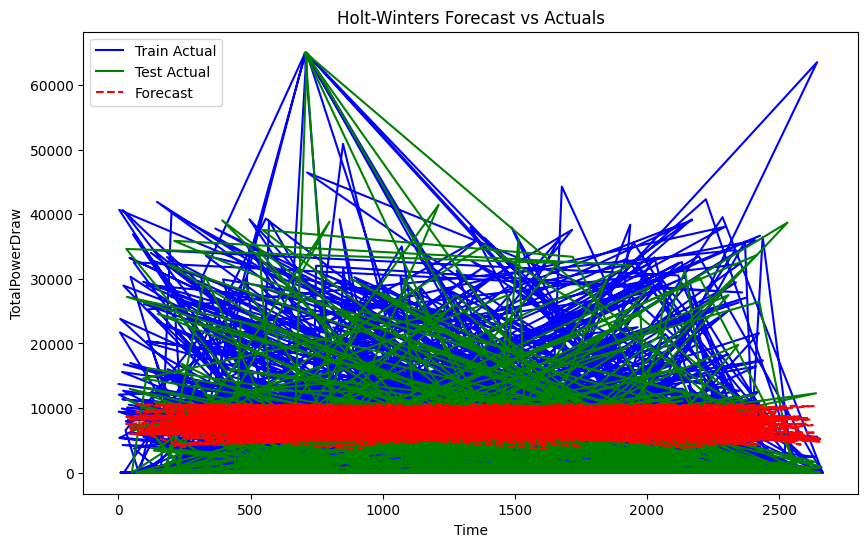

In [31]:
#Run holt-winters
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


# Fit the model
model = ExponentialSmoothing(y_train, seasonal='add', seasonal_periods=12, trend='add', damped_trend=True).fit()

# Generate predictions
y_pred = model.forecast(len(y_test))


# Calculate MSE and R²
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"R-squared (R²): {r_squared:.3f}")

#Visualize
plt.figure(figsize=(10, 6))
plt.plot(y_train.index, y_train, label='Train Actual', color='blue')
plt.plot(y_test.index, y_test, label='Test Actual', color='green')
plt.plot(y_test.index, y_pred, label='Forecast', color='red', linestyle='--')
plt.title('Holt-Winters Forecast vs Actuals')
plt.xlabel('Time')
plt.ylabel('TotalPowerDraw')
plt.legend()
plt.show()

